# STOCK PRICE ANALYSIS

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import glob

In [4]:
glob.glob(r'C:\Users\Acer\Documents\project_udemy\Time series_S&P500\individual_stocks_5yr/*csv')

['C:\\Users\\Acer\\Documents\\project_udemy\\Time series_S&P500\\individual_stocks_5yr\\AAL_data.csv',
 'C:\\Users\\Acer\\Documents\\project_udemy\\Time series_S&P500\\individual_stocks_5yr\\AAPL_data.csv',
 'C:\\Users\\Acer\\Documents\\project_udemy\\Time series_S&P500\\individual_stocks_5yr\\AAP_data.csv',
 'C:\\Users\\Acer\\Documents\\project_udemy\\Time series_S&P500\\individual_stocks_5yr\\ABBV_data.csv',
 'C:\\Users\\Acer\\Documents\\project_udemy\\Time series_S&P500\\individual_stocks_5yr\\ABC_data.csv',
 'C:\\Users\\Acer\\Documents\\project_udemy\\Time series_S&P500\\individual_stocks_5yr\\ABT_data.csv',
 'C:\\Users\\Acer\\Documents\\project_udemy\\Time series_S&P500\\individual_stocks_5yr\\ACN_data.csv',
 'C:\\Users\\Acer\\Documents\\project_udemy\\Time series_S&P500\\individual_stocks_5yr\\ADBE_data.csv',
 'C:\\Users\\Acer\\Documents\\project_udemy\\Time series_S&P500\\individual_stocks_5yr\\ADI_data.csv',
 'C:\\Users\\Acer\\Documents\\project_udemy\\Time series_S&P500\\indiv

In [5]:
len(glob.glob(r'C:\Users\Acer\Documents\project_udemy\Time series_S&P500\individual_stocks_5yr/*csv'))

505

In [6]:
company_list=[
     r'C:\\Users\\Acer\\Documents\\project_udemy\\Time series_S&P500\\individual_stocks_5yr\\AAPL_data.csv' ,
     r'C:\\Users\\Acer\\Documents\\project_udemy\\Time series_S&P500\\individual_stocks_5yr\\AMZN_data.csv'  ,
     r'C:\\Users\\Acer\\Documents\\project_udemy\\Time series_S&P500\\individual_stocks_5yr\\GOOGL_data.csv' ,
     r'C:\\Users\\Acer\\Documents\\project_udemy\\Time series_S&P500\\individual_stocks_5yr\\MSFT_data.csv'
]

In [7]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
all_data=pd.DataFrame()

for file in company_list:
    current_df=pd.read_csv(file)
    all_data=pd.concat([all_data,current_df],ignore_index=True)

In [9]:
all_data.shape

(5036, 7)

In [10]:
all_data

date     open     high      low    close     volume  Name
0     2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1     2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2     2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3     2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4     2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL
...          ...      ...      ...      ...      ...        ...   ...
5031  2018-02-01  94.7900  96.0700  93.5813  94.2600   47227882  MSFT
5032  2018-02-02  93.6400  93.9700  91.5000  91.7800   47867753  MSFT
5033  2018-02-05  90.5600  93.2400  88.0000  88.0000   51031465  MSFT
5034  2018-02-06  86.8900  91.4750  85.2500  91.3300   67998564  MSFT
5035  2018-02-07  90.4900  91.7700  89.2000  89.6100   41107592  MSFT

[5036 rows x 7 columns]

In [11]:
all_data['Name'].unique()

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

In [12]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [13]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [14]:
all_data['date']=pd.to_datetime(all_data['date'])

In [15]:
all_data['date']

0      2013-02-08
1      2013-02-11
2      2013-02-12
3      2013-02-13
4      2013-02-14
          ...    
5031   2018-02-01
5032   2018-02-02
5033   2018-02-05
5034   2018-02-06
5035   2018-02-07
Name: date, Length: 5036, dtype: datetime64[ns]

## Analysing stock price over time

In [16]:
tech_stocks=all_data['Name'].unique()

In [17]:
tech_stocks

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

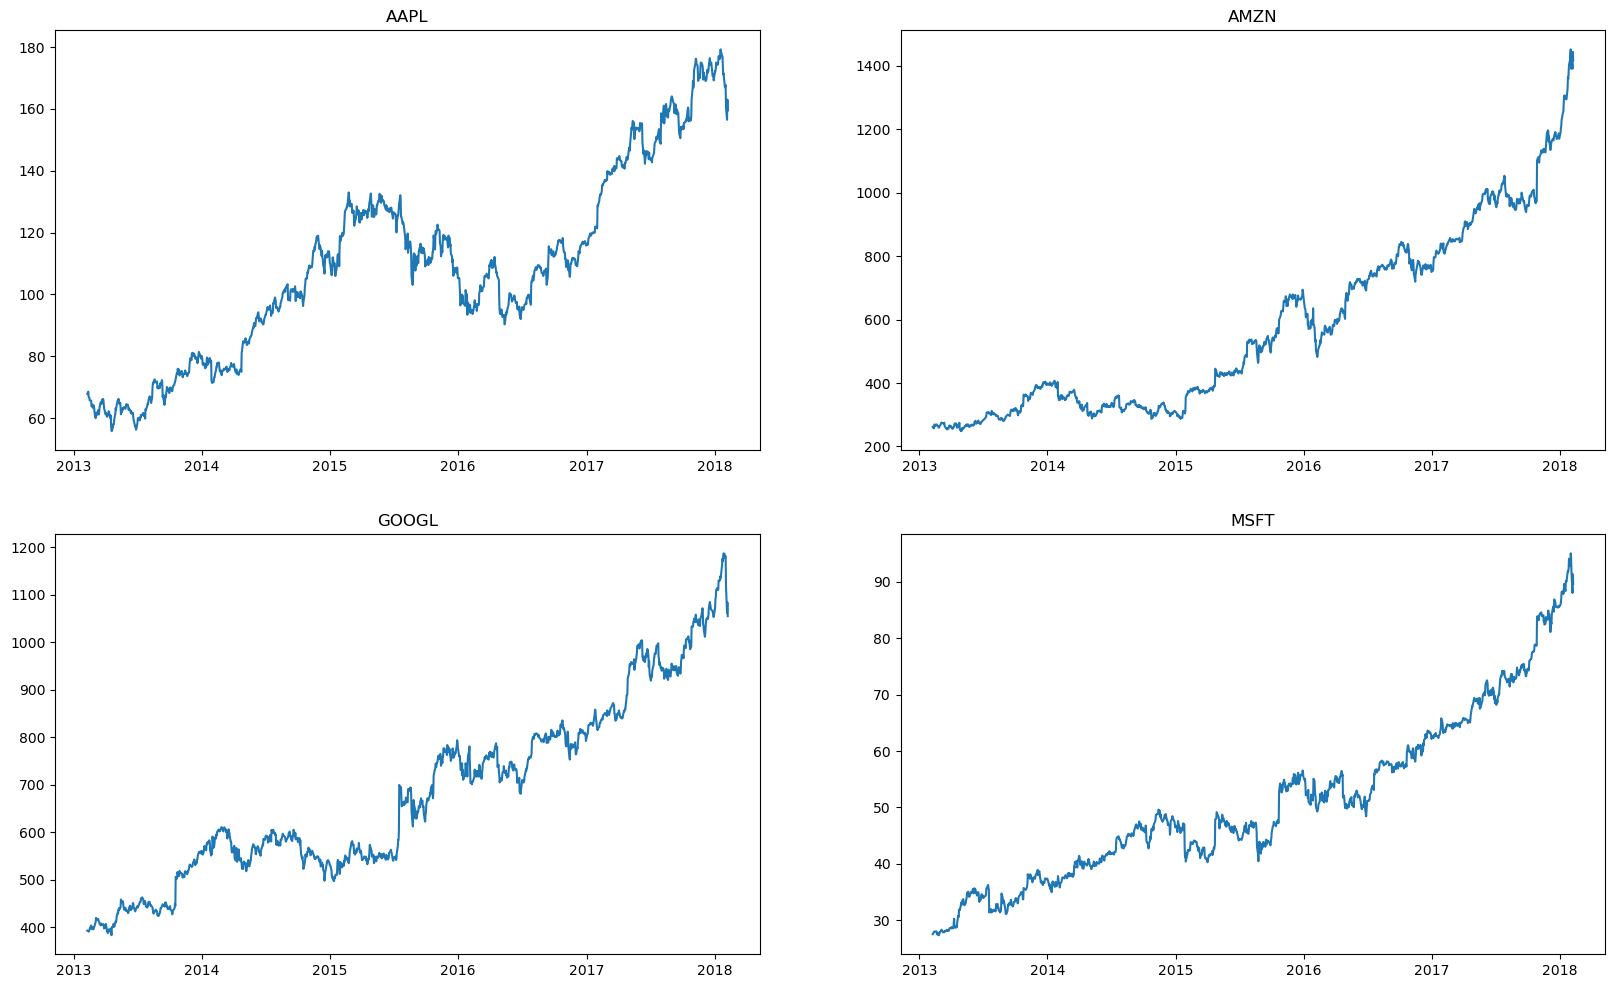

In [18]:
plt.figure(figsize=(20,12))
for index, company in enumerate(tech_stocks,1):
    plt.subplot(2,2,index)
    df=all_data[all_data['Name']==company]
    plt.plot(df['date'],df['close'])
    plt.title(company)

## Analysing moving average of stocks

In [19]:
all_data['close'].rolling(window=20).mean().tail()

5031    90.6770
5032    90.9105
5033    90.9010
5034    91.0535
5035    91.1230
Name: close, dtype: float64

In [20]:
new_data=all_data.copy()

In [21]:
new_data.set_index('date',inplace=True)

In [22]:
new_data

open     high      low    close     volume  Name
date                                                           
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL
...             ...      ...      ...      ...        ...   ...
2018-02-01  94.7900  96.0700  93.5813  94.2600   47227882  MSFT
2018-02-02  93.6400  93.9700  91.5000  91.7800   47867753  MSFT
2018-02-05  90.5600  93.2400  88.0000  88.0000   51031465  MSFT
2018-02-06  86.8900  91.4750  85.2500  91.3300   67998564  MSFT
2018-02-07  90.4900  91.7700  89.2000  89.6100   41107592  MSFT

[5036 rows x 6 columns]

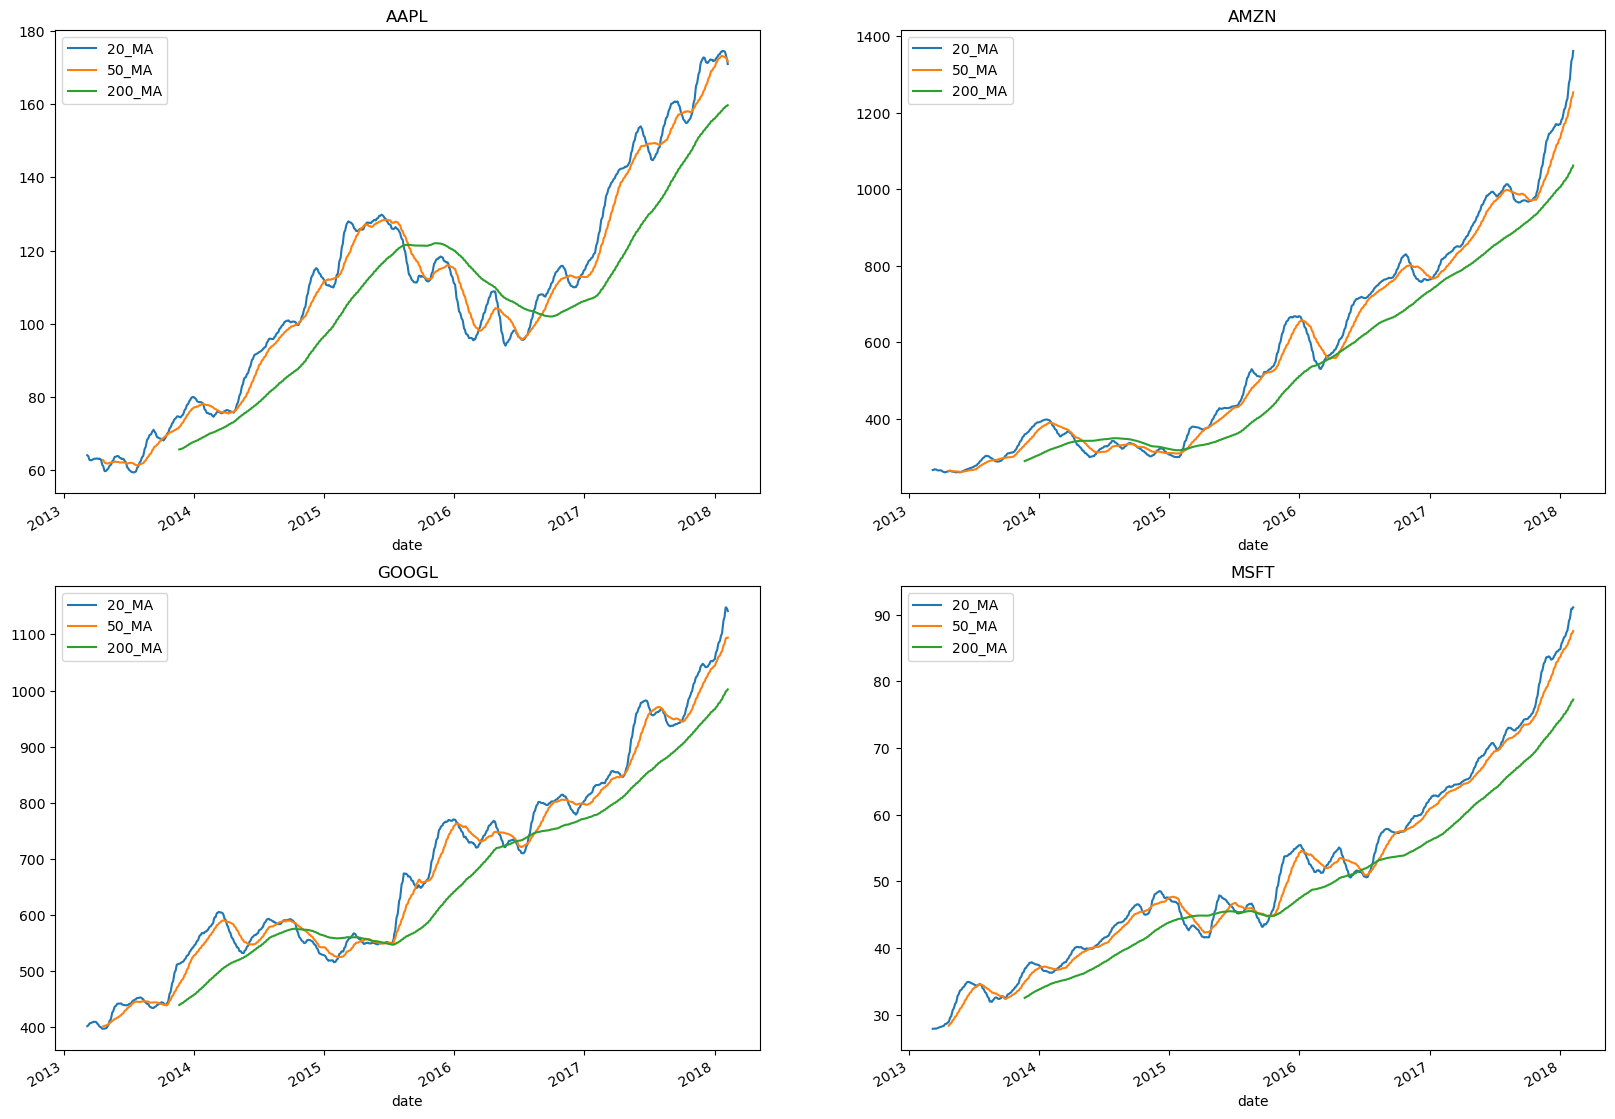

In [23]:
plt.figure(figsize=(20,15))
for index, company in enumerate(tech_stocks,1):
    plt.subplot(2,2,index)
    df=new_data[new_data['Name']==company]
    df['close'].rolling(window=20).mean().plot(ax=plt.gca())
    df['close'].rolling(window=50).mean().plot(ax=plt.gca())
    df['close'].rolling(window=200).mean().plot(ax=plt.gca())
    plt.title(company)
    plt.legend(['20_MA','50_MA','200_MA'])

## Price change in Apple stock

In [24]:
apple = pd.read_csv(r'C:\\Users\\Acer\\Documents\\project_udemy\\Time series_S&P500\\individual_stocks_5yr\\AAPL_data.csv')

In [25]:
apple.head()

date     open     high      low    close     volume  Name
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL

In [26]:
apple['daily return(%)']=apple['close'].pct_change()*100

In [27]:
apple.head()

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   daily return(%)  
0              NaN  
1         1.042235  
2        -2.506658  
3        -0.190297  
4        -0.089934

In [28]:
import plotly.express as px

In [29]:
px.line(apple,x='date',y='daily return(%)')

## Resampling analysis of closing price

In [30]:
apple['date']=pd.to_datetime(apple['date'])

In [31]:
apple.dtypes

date               datetime64[ns]
open                      float64
high                      float64
low                       float64
close                     float64
volume                      int64
Name                       object
daily return(%)           float64
dtype: object

In [32]:
apple.head()

date     open     high      low    close     volume  Name  \
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   daily return(%)  
0              NaN  
1         1.042235  
2        -2.506658  
3        -0.190297  
4        -0.089934

In [33]:
apple.set_index('date',inplace=True)

In [34]:
apple.head()

open     high      low    close     volume  Name  \
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

            daily return(%)  
date                         
2013-02-08              NaN  
2013-02-11         1.042235  
2013-02-12        -2.506658  
2013-02-13        -0.190297  
2013-02-14        -0.089934

In [35]:
apple['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<Axes: xlabel='date'>

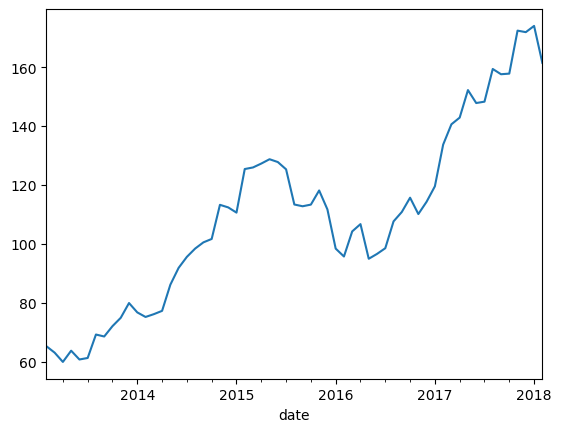

In [36]:
apple['close'].resample('M').mean().plot()

In [37]:
apple['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

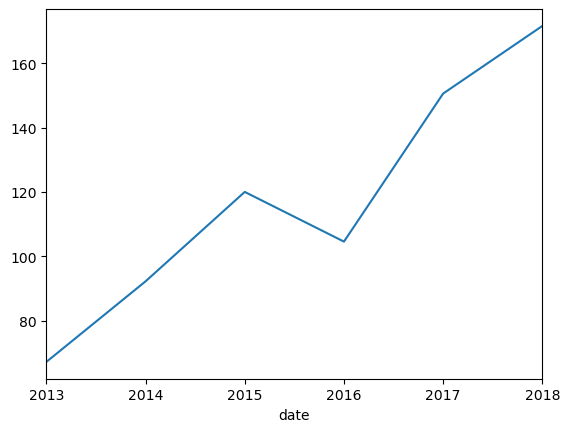

In [38]:
apple['close'].resample('Y').mean().plot()

In [39]:
apple['close'].resample('Q').mean()

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<Axes: xlabel='date'>

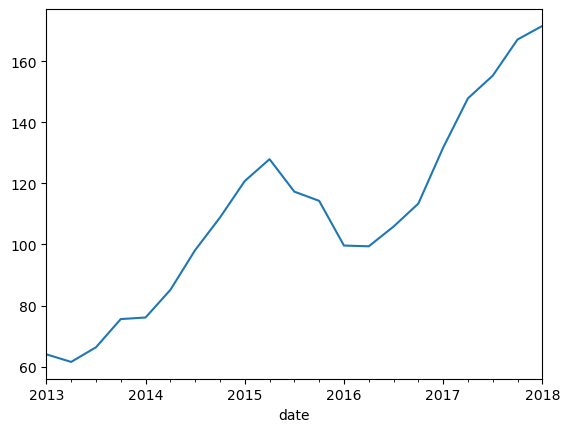

In [40]:
apple['close'].resample('Q').mean().plot()

## Correlation analysis

In [41]:
company_list

['C:\\\\Users\\\\Acer\\\\Documents\\\\project_udemy\\\\Time series_S&P500\\\\individual_stocks_5yr\\\\AAPL_data.csv',
 'C:\\\\Users\\\\Acer\\\\Documents\\\\project_udemy\\\\Time series_S&P500\\\\individual_stocks_5yr\\\\AMZN_data.csv',
 'C:\\\\Users\\\\Acer\\\\Documents\\\\project_udemy\\\\Time series_S&P500\\\\individual_stocks_5yr\\\\GOOGL_data.csv',
 'C:\\\\Users\\\\Acer\\\\Documents\\\\project_udemy\\\\Time series_S&P500\\\\individual_stocks_5yr\\\\MSFT_data.csv']

In [42]:
app=pd.read_csv(company_list[0])
amzn=pd.read_csv(company_list[1])
google=pd.read_csv(company_list[2])
msft=pd.read_csv(company_list[3])


In [43]:
closing_price=pd.DataFrame()

closing_price['app']=app['close']
closing_price['amzn']=amzn['close']
closing_price['google']=google['close']
closing_price['msft']=msft['close']

In [44]:
closing_price.head()

app    amzn    google   msft
0  67.8542  261.95  393.0777  27.55
1  68.5614  257.21  391.6012  27.86
2  66.8428  258.70  390.7403  27.88
3  66.7156  269.47  391.8214  28.03
4  66.6556  269.24  394.3039  28.04

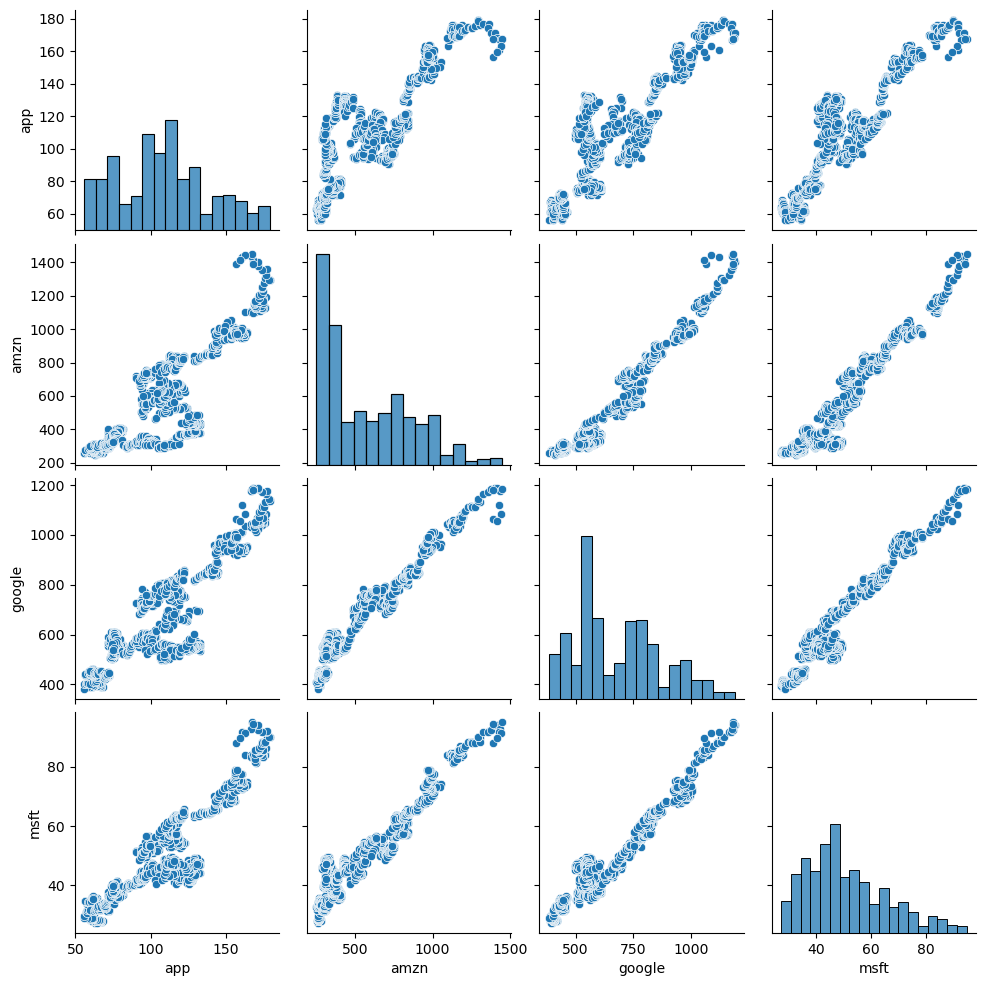

In [45]:
sns.pairplot(closing_price)

In [46]:
closing_price.corr()

app      amzn    google      msft
app     1.000000  0.819078  0.843736  0.899689
amzn    0.819078  1.000000  0.973988  0.955977
google  0.843736  0.973988  1.000000  0.970779
msft    0.899689  0.955977  0.970779  1.000000

<Axes: >

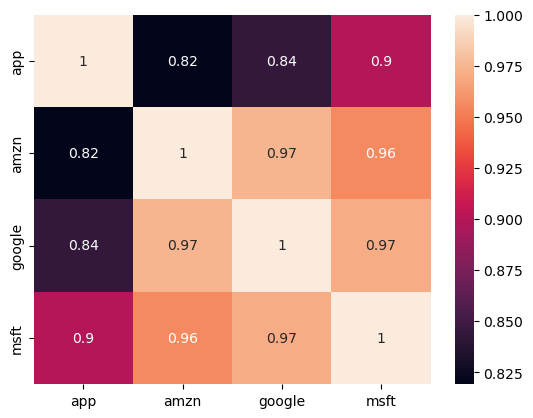

In [47]:
sns.heatmap(closing_price.corr(),annot=True)

## Correlation analysis using pairgrid plot(histogram,scatter and kde)

In [48]:
closing_price['app'].pct_change()*100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: app, Length: 1259, dtype: float64

In [49]:
closing_price['app_%_change']=closing_price['app'].pct_change()*100
closing_price['amzn_%_change']=closing_price['amzn'].pct_change()*100
closing_price['google_%_change']=closing_price['google'].pct_change()*100
closing_price['msft_%_change']=closing_price['msft'].pct_change()*100

In [50]:
closing_price.head()

app    amzn    google   msft  app_%_change  amzn_%_change  \
0  67.8542  261.95  393.0777  27.55           NaN            NaN   
1  68.5614  257.21  391.6012  27.86      1.042235      -1.809506   
2  66.8428  258.70  390.7403  27.88     -2.506658       0.579293   
3  66.7156  269.47  391.8214  28.03     -0.190297       4.163123   
4  66.6556  269.24  394.3039  28.04     -0.089934      -0.085353   

   google_%_change  msft_%_change  
0              NaN            NaN  
1        -0.375625       1.125227  
2        -0.219841       0.071788  
3         0.276680       0.538020  
4         0.633579       0.035676

In [51]:
closing_price.columns

Index(['app', 'amzn', 'google', 'msft', 'app_%_change', 'amzn_%_change',
       'google_%_change', 'msft_%_change'],
      dtype='object')

In [52]:
closing_p=closing_price[['app_%_change', 'amzn_%_change',
       'google_%_change', 'msft_%_change']]

In [53]:
closing_p.head()

app_%_change  amzn_%_change  google_%_change  msft_%_change
0           NaN            NaN              NaN            NaN
1      1.042235      -1.809506        -0.375625       1.125227
2     -2.506658       0.579293        -0.219841       0.071788
3     -0.190297       4.163123         0.276680       0.538020
4     -0.089934      -0.085353         0.633579       0.035676

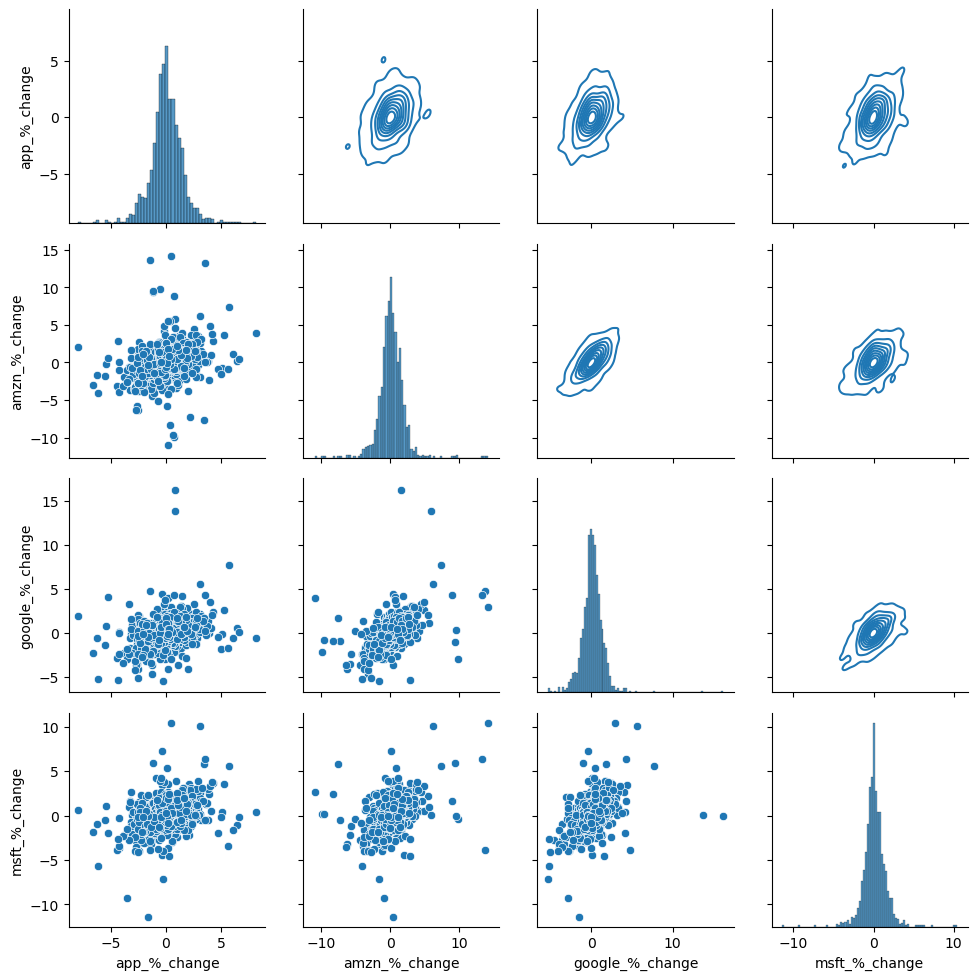

In [54]:
g=sns.PairGrid(data=closing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)

In [55]:
closing_p.corr()

app_%_change  amzn_%_change  google_%_change  msft_%_change
app_%_change         1.000000       0.287659         0.348858       0.366598
amzn_%_change        0.287659       1.000000         0.548423       0.402678
google_%_change      0.348858       0.548423         1.000000       0.488373
msft_%_change        0.366598       0.402678         0.488373       1.000000

<Axes: >

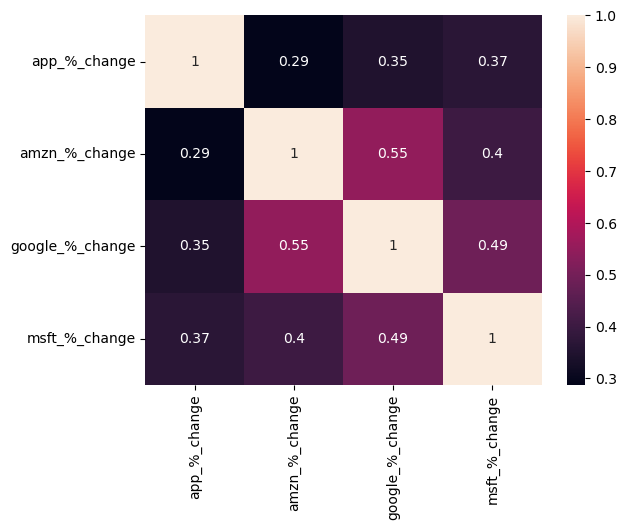

In [56]:
sns.heatmap(closing_p.corr(),annot=True)